In [325]:
import numpy as np 

In [326]:
h = 0.001
h2 = h*h
xi = np.arange(0, 1+h, h)
n = len(xi)
y0 = 3 
yn = 0

# diagonal inferior
a = 1 + 2.5*h*xi  # estava com o sinal trocado com eq. p/ c
# diagonal principal
b = -2 + h2*xi**2 
# diagonal superior
c = 1 - 2.5*h*xi  # estava com o sinal trocado com eq. p/ a
d = h2*np.exp(xi)

d[0] = d[0] - a[0]*y0
d[-1] = d[-1] - a[-1]*yn

In [327]:
def TDMASolve(a, b, c, d):
    n = len(d)#n em números é linhas

    # Modifica o primeiro coeficiente de cada linha
    c[0] /= b[0] # Risco de divisão por zero.
    d[0] /= b[0]

    for i in range(1, n):
        ptemp = b[i] - (a[i] * c[i-1])
        c[i] /= ptemp
        d[i] = (d[i] - a[i] * d[i-1])/ptemp

    # retrosubstituição
    x = [0 for i in range(n)]
    x[-1] = d[-1]
    for i in range(-2, -n-1, -1):
        x[i] = d[i] - c[i] * x[i+1]
    
    return x

In [328]:
yi = TDMASolve(a, b, c, d)

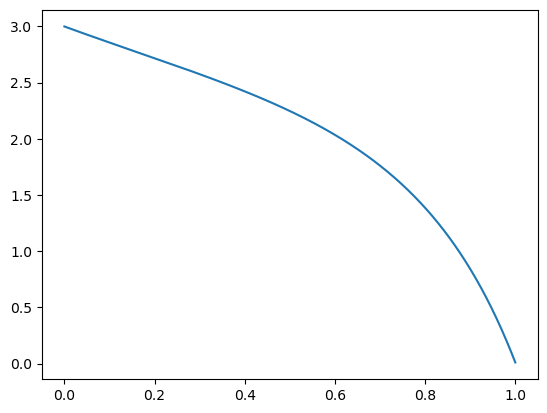

In [329]:
from matplotlib import pyplot as plt 
plt.plot(xi, yi)
plt.show()

In [330]:
def d2y(a,b,c):
    return (c - 2*b + a) / h2

def dy(a,b):
    return 0.5*(b - a) / h


In [331]:
i = 150
x = xi[i]
y = yi[i]
lhs = d2y(yi[i-1], yi[i], yi[i+1]) - 5*x*dy(yi[i-1], yi[i+1]) + y*x**2
rhs = np.exp(x)

In [332]:
lhs

1.1618342420429328

In [333]:
rhs

1.161834242728283

In [334]:
np.isclose(lhs, rhs)

True

In [335]:
yi[0]

2.998531043574957

In [336]:
yi[-1]

0.01038802822034332